In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['.ipynb_checkpoints', 'ClassifyUsingSVM.ipynb', 'Dataset_BUSI_with_GT']

In [3]:
# Set paths to your image directories
class_0_path = 'Dataset_BUSI_with_GT/normal/'
class_1_path = 'Dataset_BUSI_with_GT/benign/'
class_2_path = 'Dataset_BUSI_with_GT/malignant/'

In [4]:
# Function to load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize image to 64x64 pixels
            images.append(img.flatten())  # Flatten the image to a 1D array
            labels.append(label)
    return images, labels

# Load images from all three classes
images_0, labels_0 = load_images_from_folder(class_0_path, 0)
images_1, labels_1 = load_images_from_folder(class_1_path, 1)
images_2, labels_2 = load_images_from_folder(class_2_path, 2)

# Combine the data and labels from all classes
X = np.array(images_0 + images_1 + images_2)
y = np.array(labels_0 + labels_1 + labels_2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Create an SVM model with a linear kernel (or other kernels like 'rbf', 'poly', etc.)
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [17]:
y_pred = svm_model.predict(X_test)

In [18]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 71.94%
Confusion Matrix:
 [[ 44  30   0]
 [ 23 239   6]
 [  2  72  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.62        74
           1       0.70      0.89      0.78       268
           2       0.91      0.44      0.59       132

    accuracy                           0.72       474
   macro avg       0.75      0.64      0.66       474
weighted avg       0.75      0.72      0.70       474



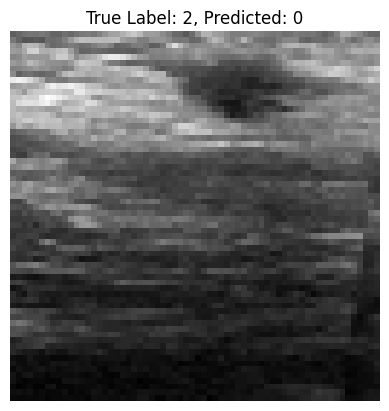

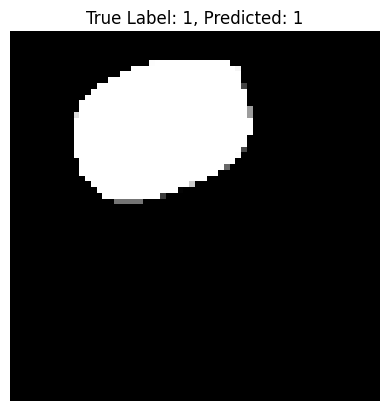

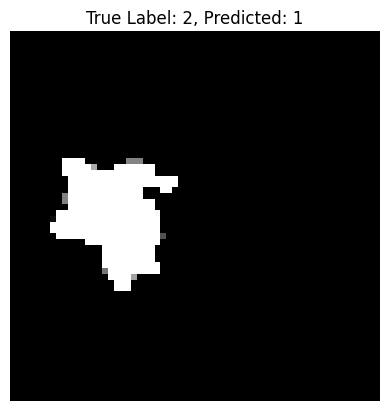

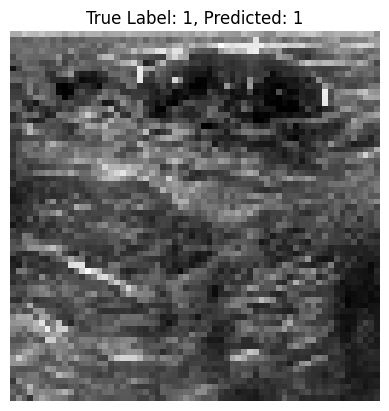

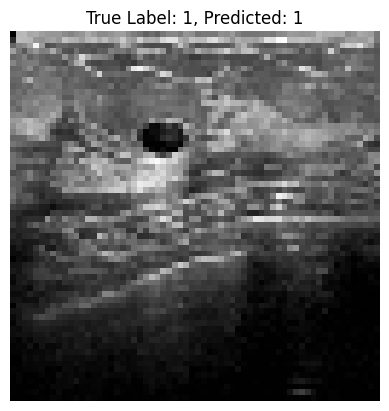

In [25]:
# Function to display an image
def display_image(image, label, predicted_label):
    plt.imshow(image.reshape(64, 64), cmap='gray')
    plt.title(f'True Label: {label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Display a few test images with their predicted labels
for i in range(5):
    display_image(X_test[i], y_test[i], y_pred[i])
